##### <strong>Target:</strong>
- 'SuicidalideationPassive'
- Case: 11.61%

##### <strong>Parameters:</strong>
1. Cross Validation nubmer: 5 (outer and inner)
2. n_estimator: np.arange(20, 200, 20)
3. max_depth: np.arange(10, 100, 10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, log_loss

#### 1. Raw GPS data

In [3]:
my_data = pd.read_csv('/home/ubuntu/SEOYOON/KSAD/KSAD_GPS_TOTAL_v2_0to1.csv', header=0)
my_data['KEY'] = my_data['KEY'].astype(str)
len(my_data)

4567

In [4]:
target = 'SuicidalideationPassive'
my_data = my_data.dropna(subset=[target])
len(my_data)

4547

In [5]:
print("case number: {}".format(sum(my_data[target])))
print("case ratio: {:.2f}%".format(sum(my_data[target])/len(my_data)*100))

case number: 528.0
case ratio: 11.61%


#### CONSTANTS:

In [6]:
k_fold = 5

num_samples = len(my_data)
each_fold_size = int(num_samples/k_fold) +1

print('num_samples: ', num_samples)
print('fold_size: ', each_fold_size)

num_samples:  4547
fold_size:  910


#### PARAMETERS:

In [7]:
X = my_data.iloc[:, 1:27]
features = X.columns

In [8]:
y = my_data[target].astype(int)

In [9]:
X = X.to_numpy()
y = y.to_numpy().ravel()

In [10]:
def plot_feature_importances(model):
    n_features = len(features)
    plt.figure(figsize=(6,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    plt.show()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score



--------------------------------------------------
Loop:  1


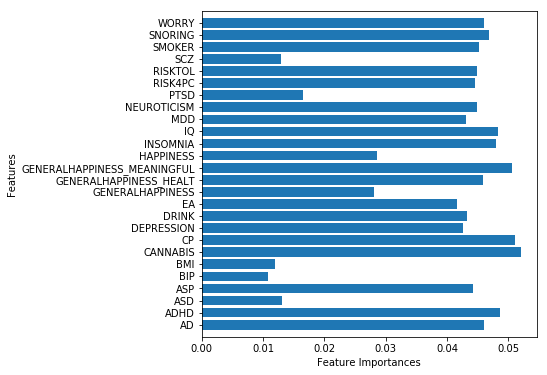

1. Feature Importances.......................
	 [0.04610176 0.04863975 0.01316817 0.04430514 0.01086515 0.01199698
 0.05200808 0.05103774 0.04261069 0.04319724 0.04164819 0.02805242
 0.04582323 0.05058088 0.02853513 0.04806053 0.04836931 0.0431547
 0.04492092 0.01646549 0.04452439 0.04492696 0.01286071 0.0452413
 0.0468757  0.04602943]
2. best train parameter......................
	 {'max_depth': 30, 'n_estimators': 100}
3. best train score..........................
	 0.5492046817851788


4. ROC-AUC...................................
	 0.49936948297604034
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[792   1]
 [117   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       793
          1       0.00      0.00      0.00       117

avg / total       0.76      0.87      0.81       910

8. Accuracy score............................
	 0.870329

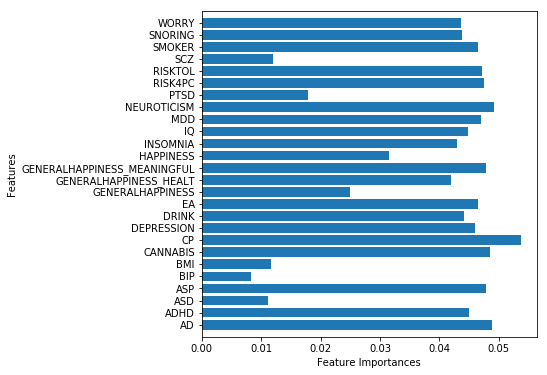

1. Feature Importances.......................
	 [0.04886392 0.04504558 0.01115892 0.04783854 0.00823767 0.01170214
 0.04844308 0.05364469 0.04599547 0.04405107 0.04640484 0.02492968
 0.04190941 0.04777321 0.03150735 0.04289547 0.04487832 0.04702731
 0.04916265 0.01795588 0.04744075 0.04711882 0.01194592 0.04654079
 0.043864   0.04366452]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 40}
3. best train score..........................
	 0.5297855359309631


4. ROC-AUC...................................
	 0.49878345498783455
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[820   2]
 [ 88   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.90      1.00      0.95       822
          1       0.00      0.00      0.00        88

avg / total       0.82      0.90      0.86       910

8. Accuracy score............................
	 0.90109

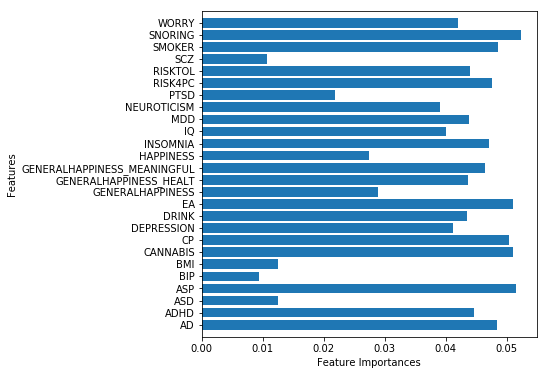

1. Feature Importances.......................
	 [0.04842441 0.04458874 0.01248922 0.05162588 0.00944931 0.01249909
 0.05099608 0.05036818 0.04121221 0.04346681 0.05099716 0.02892126
 0.04369893 0.04654141 0.02742499 0.04713176 0.04012898 0.04389421
 0.03910815 0.02179445 0.04760133 0.04401649 0.01074968 0.0485371
 0.05229822 0.04203594]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 20}
3. best train score..........................
	 0.5449394289133841


4. ROC-AUC...................................
	 0.5034630366404899
5. f1 score..................................
	 0.016129032258064516
6. Confusion matrix..........................
[[786   1]
 [121   1]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.87      1.00      0.93       787
          1       0.50      0.01      0.02       122

avg / total       0.82      0.87      0.81       909

8. Accuracy score.......................

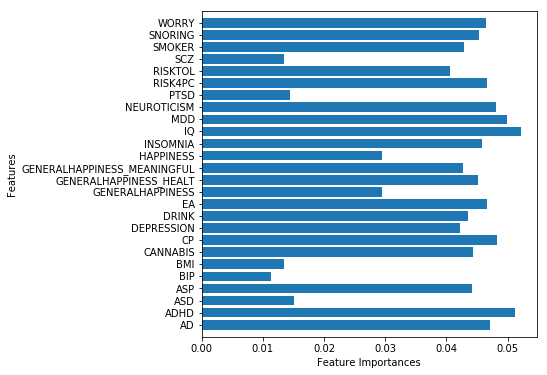

1. Feature Importances.......................
	 [0.04719019 0.05114214 0.01514848 0.04413293 0.01132048 0.01349655
 0.04429279 0.04830778 0.04214916 0.04345565 0.04658726 0.02955172
 0.04517947 0.04278235 0.02944146 0.0459003  0.05212184 0.04986043
 0.04812902 0.01437279 0.04663629 0.04056612 0.01352429 0.042818
 0.04535007 0.04654245]
2. best train parameter......................
	 {'max_depth': 80, 'n_estimators': 40}
3. best train score..........................
	 0.5387886209108163


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[809   0]
 [100   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       809
          1       0.00      0.00      0.00       100

avg / total       0.79      0.89      0.84       909

8. Accuracy score............................
	 0.88998899889989


------

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


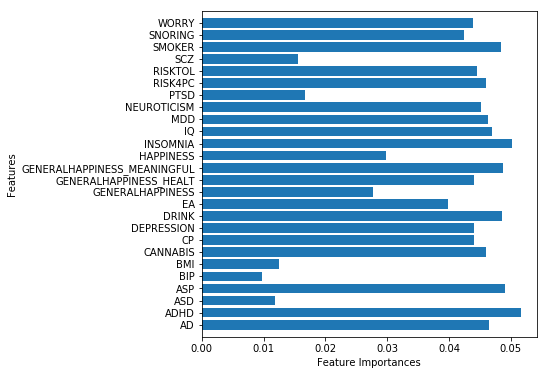

1. Feature Importances.......................
	 [0.04653058 0.05156394 0.01178244 0.04906029 0.00975219 0.01256337
 0.04591683 0.04406266 0.04403615 0.04856975 0.03979284 0.02768444
 0.04401245 0.04878423 0.02988349 0.05022278 0.04691179 0.04627968
 0.04518327 0.01664064 0.04593719 0.04453211 0.01559354 0.04843616
 0.04244366 0.04382353]
2. best train parameter......................
	 {'max_depth': 20, 'n_estimators': 60}
3. best train score..........................
	 0.5331996691358977


4. ROC-AUC...................................
	 0.5
5. f1 score..................................
	 0.0
6. Confusion matrix..........................
[[808   0]
 [101   0]]
7. Classify report...........................
             precision    recall  f1-score   support

          0       0.89      1.00      0.94       808
          1       0.00      0.00      0.00       101

avg / total       0.79      0.89      0.84       909

8. Accuracy score............................
	 0.8888888888888888


/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
import os
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(20, 200, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_4_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

In [ ]:
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': np.arange(200, 500, 20),
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
    if not os.path.exists("./TuningResult/"):
        os.mkdir("./TuningResult/")
    filename = "TuningResult/KSAD_4_HT"+str(loop)+".csv"
    result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1

In [ ]:
inner_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
outer_cv = KFold(n_splits = k_fold, shuffle=False, random_state = 123)
loop=1
for train_index, test_index in outer_cv.split(X, y):
    print('\n')
    print('-'*50)
    print('Loop: ', loop)
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #No Tuning
#     rf = RandomForestClassifier(n_estimators= 100, min_samples_leaf=5)
#     rf.fit(X_train, y_train)
#     y_pred = rf.predict(X_test)
    
    #Tuning
    rf = RandomForestClassifier()
    params = {'n_estimators': [1000],
              'max_depth': np.arange(10, 100, 10)}
    rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv = inner_cv, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    rf_grid.fit(X_train, y_train)
    y_pred=rf_grid.predict(X_test)
    
    result = pd.DataFrame(rf_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
#     if not os.path.exists("./TuningResult/"):
#         os.mkdir("./TuningResult/")
#     filename = "TuningResult/KSAD_4_HT"+str(loop)+".csv"
#     result.to_csv(filename, index=False)
    
    best_est = rf_grid.best_estimator_
    plot_feature_importances(best_est)
    
    print("{:.<45}".format("1. Feature Importances"))
    print("\t",best_est.feature_importances_)
    
    print("{:.<45}".format("2. best train parameter"))
    print("\t",rf_grid.best_params_)
    print("{:.<45}".format("3. best train score"))
    print("\t",rf_grid.best_score_)
    
    print("\n")
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("{:.<45}".format("4. ROC-AUC"))
    print("\t",roc_auc)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    print("{:.<45}".format("5. f1 score"))
    print("\t",f1)
    print("{:.<45}".format("6. Confusion matrix"))
    print(confusion_matrix(y_test, y_pred))
    print("{:.<45}".format("7. Classify report"))
    print(classification_report(y_test, y_pred))
    print("{:.<45}".format("8. Accuracy score"))
    print("\t",accuracy_score(y_test, y_pred))
    
    loop += 1